<a href="https://colab.research.google.com/github/highlevelcoding/Data-Science-Project/blob/main/Sentiment_Analysis_of_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-3-3df8bc022321>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=imdb_data, x='vader_sentiment', palette='pastel')


Missing data in each column:
 review       0
sentiment    0
dtype: int64


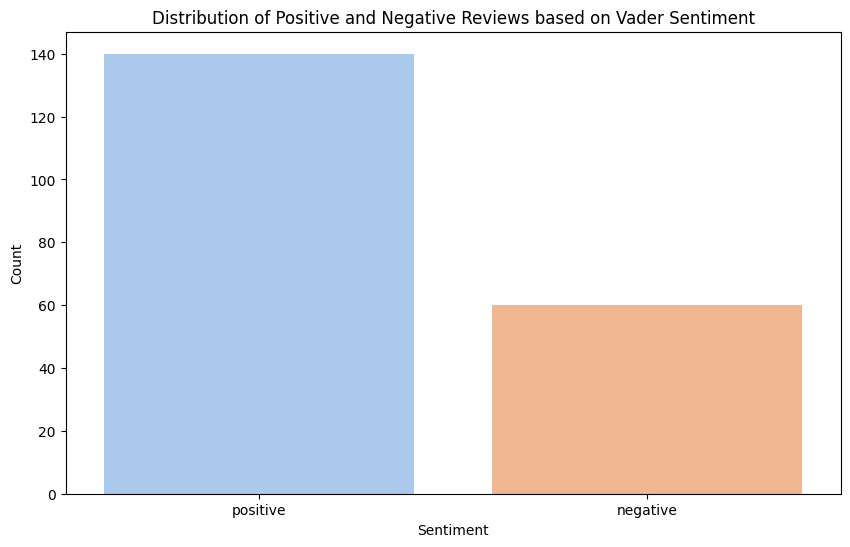


Processed data with sentiment analysis:
                                                 review vader_sentiment  \
0    This movie was fantastic! The plot was engagin...        positive   
1    I didn't enjoy this movie. The storyline was p...        positive   
2    The actors did a great job, and I loved the ci...        positive   
3    The film was a waste of time. I wouldn’t recom...        negative   
4    An amazing film with a moving story and incred...        positive   
5    It was hard to sit through this movie; the pac...        negative   
6    The special effects were stunning, but the sto...        positive   
7    A beautifully crafted movie with a heartwarmin...        positive   
8     I fell asleep halfway through; it was that dull.        negative   
9      A true masterpiece, it deserves all the praise!        positive   
10   This movie was fantastic! The plot was engagin...        positive   
11   I didn't enjoy this movie. The storyline was p...        positive

In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '//content//drive//MyDrive//IMDB_200_reviews_sample.csv'  # Update this path to your local file
imdb_data = pd.read_csv(file_path)

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Step 1: Check for missing data
missing_data = imdb_data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# Step 2: Process the data
# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords for each review
imdb_data['cleaned_review'] = imdb_data['review'].apply(lambda x: ' '.join(
    [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words]
))

# Step 3: Sentiment Analysis using Vader Lexicon
# Initialize Vader Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply Vader analysis to get compound score and determine sentiment
imdb_data['vader_score'] = imdb_data['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
imdb_data['vader_sentiment'] = imdb_data['vader_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')

# Step 4: Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=imdb_data, x='vader_sentiment', palette='pastel')
plt.title('Distribution of Positive and Negative Reviews based on Vader Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display all results of the analysis
pd.set_option('display.max_rows', 200)  # Set display option to show all rows
print("\nProcessed data with sentiment analysis:\n", imdb_data[['review', 'vader_sentiment', 'vader_score']])
